In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=419e27b56f810fa7dc11383804d1af24


In [26]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-58.82811119919744 -118.74012439522747
-72.7532634703207 -17.864147048104087
-55.031860440631256 154.69480181337866
59.44174229031114 -25.051325290952207
40.10577347121455 89.26784359449942
0.21981937925141892 84.75410619479953
69.09426361083536 156.03031941433375
-53.79425478501802 84.62097913706629
42.811395429617846 178.5091921576025
-44.15832137859751 -78.86120024157829
2.823392464101971 -88.32844431963676
75.9917307909908 22.003231138687653
-24.174420587619792 126.78205165101514
-42.55037575522561 170.96410533445453
-65.26045883971669 115.33475913736356
75.36232471810305 -32.96523024598426
-15.089264660716111 -12.51621244233803
-77.44456754701778 -136.74373590418722
53.46569734929059 154.57384492012102
-11.142048473791547 69.63325164650479
-36.941766792816225 10.45667436182876
30.24596662580055 -13.040090056533359
-9.951780024288297 91.16807054795436
16.11152769474151 140.75987920593303
14.349795177379804 52.02016957315399
13.310224366367066 -118.19207249010844
60.228896834550625 

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [31]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | grindavik
Processing Record 5 of Set 1 | korla
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | hokitika
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | sobolevo
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | teguise
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 of S

Processing Record 38 of Set 4 | alekseyevskoye
Processing Record 39 of Set 4 | mahibadhoo
Processing Record 40 of Set 4 | maldonado
Processing Record 41 of Set 4 | umm kaddadah
Processing Record 42 of Set 4 | nuristan
Processing Record 43 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | bubaque
Processing Record 47 of Set 4 | luangwa
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | hanstholm
Processing Record 1 of Set 5 | peniche
Processing Record 2 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 5 | navabad
City not found. Skipping...
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | wlodawa
Processing Record 6 of Set 5 | huangcun
Processing Record 7 of Set 5 | khorixas
Processing Record 8 of Set 5 | ruatoria
City not found. Skippi

Processing Record 23 of Set 8 | sovetskaya gavan
Processing Record 24 of Set 8 | nome
Processing Record 25 of Set 8 | luganville
Processing Record 26 of Set 8 | mugur-aksy
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | tibati
Processing Record 29 of Set 8 | eichenzell
Processing Record 30 of Set 8 | villazon
Processing Record 31 of Set 8 | chicama
Processing Record 32 of Set 8 | saint-paul
Processing Record 33 of Set 8 | kurilsk
Processing Record 34 of Set 8 | faanui
Processing Record 35 of Set 8 | bandarbeyla
Processing Record 36 of Set 8 | rock springs
Processing Record 37 of Set 8 | north mankato
Processing Record 38 of Set 8 | eureka
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | kromy
Processing Record 42 of Set 8 | diffa
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | saposoa
Processing Record 45 of Set 8 | palabuhanratu
City not found. Skipping...
Processi

Processing Record 9 of Set 12 | seduva
Processing Record 10 of Set 12 | freetown
Processing Record 11 of Set 12 | itinga
Processing Record 12 of Set 12 | zaysan
Processing Record 13 of Set 12 | naryan-mar
Processing Record 14 of Set 12 | ahuimanu
Processing Record 15 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 12 | labutta
City not found. Skipping...
Processing Record 17 of Set 12 | yirol
City not found. Skipping...
Processing Record 18 of Set 12 | trojan
Processing Record 19 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 20 of Set 12 | westerland
Processing Record 21 of Set 12 | shakiso
Processing Record 22 of Set 12 | phuket
Processing Record 23 of Set 12 | inhambane
Processing Record 24 of Set 12 | coahuayana
Processing Record 25 of Set 12 | nguiu
City not found. Skipping...
Processing Record 26 of Set 12 | kalilangan
Processing Record 27 of Set 12 | tala
Processing Record 28 of Set 12 | west bay
Processing Record 29 of Set 1

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.39,75,37,16.55,PF,2022-07-30 10:25:15
1,Mar Del Plata,-38.0023,-57.5575,47.88,78,0,3.00,AR,2022-07-30 10:14:51
2,Hobart,-42.8794,147.3294,44.06,79,75,4.61,AU,2022-07-30 10:25:16
3,Grindavik,63.8424,-22.4338,50.47,71,75,11.50,IS,2022-07-30 10:18:28
4,Korla,41.7597,86.1469,91.11,21,94,14.32,CN,2022-07-30 10:25:16
5,Hambantota,6.1241,81.1185,83.64,71,93,19.08,LK,2022-07-30 10:23:02
6,Srednekolymsk,67.4500,153.6833,63.84,43,79,4.29,RU,2022-07-30 10:23:03
7,Busselton,-33.6500,115.3333,51.89,62,96,10.78,AU,2022-07-30 10:25:17
8,Nikolskoye,59.7035,30.7861,66.09,81,93,9.10,RU,2022-07-30 10:17:12
9,Castro,-24.7911,-50.0119,37.92,91,0,1.79,BR,2022-07-30 10:15:47


In [33]:
len(city_data)

576

In [34]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [35]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-30 10:25:15,-23.1203,-134.9692,72.39,75,37,16.55
1,Mar Del Plata,AR,2022-07-30 10:14:51,-38.0023,-57.5575,47.88,78,0,3.00
2,Hobart,AU,2022-07-30 10:25:16,-42.8794,147.3294,44.06,79,75,4.61
3,Grindavik,IS,2022-07-30 10:18:28,63.8424,-22.4338,50.47,71,75,11.50
4,Korla,CN,2022-07-30 10:25:16,41.7597,86.1469,91.11,21,94,14.32
5,Hambantota,LK,2022-07-30 10:23:02,6.1241,81.1185,83.64,71,93,19.08
6,Srednekolymsk,RU,2022-07-30 10:23:03,67.4500,153.6833,63.84,43,79,4.29
7,Busselton,AU,2022-07-30 10:25:17,-33.6500,115.3333,51.89,62,96,10.78
8,Nikolskoye,RU,2022-07-30 10:17:12,59.7035,30.7861,66.09,81,93,9.10
9,Castro,BR,2022-07-30 10:15:47,-24.7911,-50.0119,37.92,91,0,1.79


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

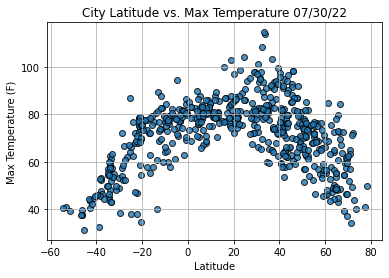

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

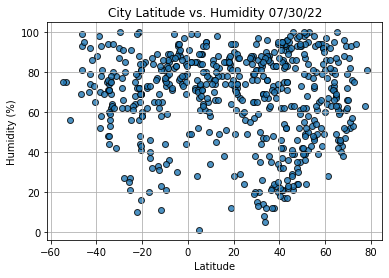

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

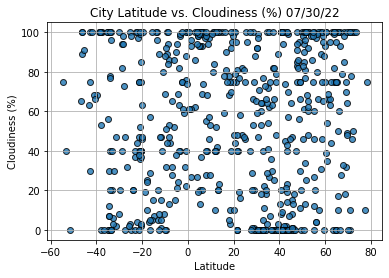

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

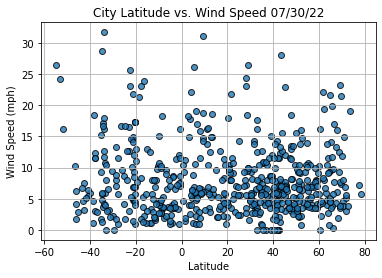

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
#create new dataframe
index13 = city_data_df.loc[13]

#get all northern hemisphere latitudes
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
571     True
572    False
573     True
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

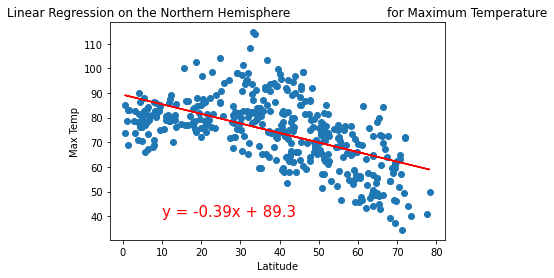

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

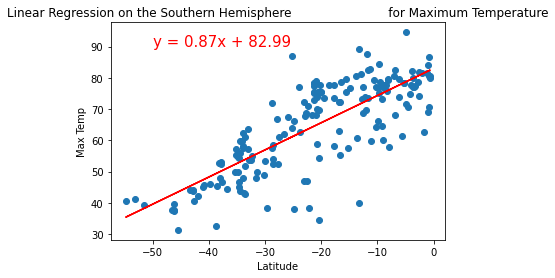

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

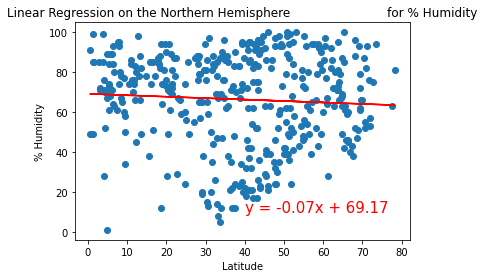

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

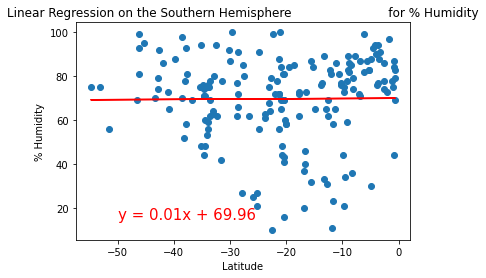

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

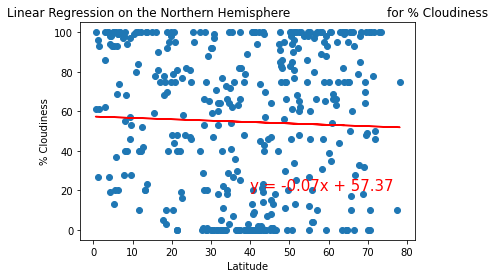

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,20))

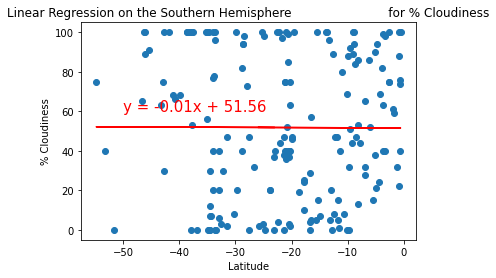

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

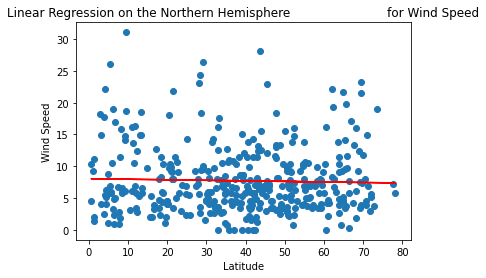

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

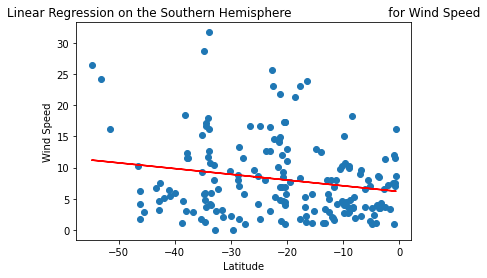

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [60]:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 